In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
import torch

# add path of Tangram repository for importing it
sys.path.append("./Tangram") 
import tangram as tg

In [20]:
path = os.path.join('data', 'corrected_ad_sp.h5ad')
ad_sp = sc.read_h5ad(path)
ad_sp

AnnData object with n_obs × n_vars = 27261 × 17919
    obs: 'x', 'y'

sc data might also be ought to only have test data because otherwise there are ones in sc data that is already mapped.

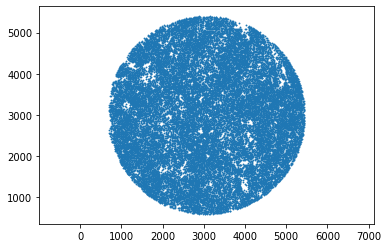

In [21]:
plt.axis('equal')
plt.scatter(ad_sp.obs.x.values, 
            ad_sp.obs.y.values, 
            s=.7)

In [4]:
sc.pp.subsample(ad_sp, fraction=0.4, random_state=0)
ad_sp

/home/myp2113/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


AnnData object with n_obs × n_vars = 10904 × 17919
    obs: 'x', 'y'

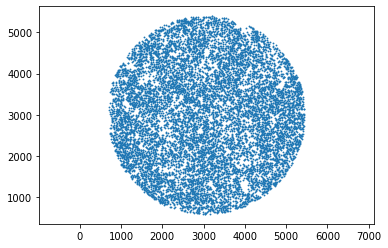

In [19]:
plt.axis('equal')
plt.scatter(ad_sp.obs.x.values, 
            ad_sp.obs.y.values, 
            s=.7)

In [6]:
# single-cell data need the following steps:
# 1. remove mitochondrial genes, which are removed in this data set
# 2. normalization
# 3. log(1+p) transformation

path = os.path.join('data', 'corrected_ad_sc.h5ad')
ad_sc = sc.read_h5ad(path)
sc.pp.normalize_total(ad_sc)
# sc.pp.log1p(ad_sc)
ad_sc

AnnData object with n_obs × n_vars = 26139 × 2505
    obs: 'cluster', 'subcluster'

In [7]:
ad_sc.X

array([[0.06959153, 0.        , 0.20877458, ..., 0.06959153, 0.13918306,
        0.        ],
       [0.06167253, 0.06167253, 0.        , ..., 0.        , 0.        ,
        0.1850176 ],
       [0.        , 0.        , 0.16689342, ..., 0.25034013, 0.16689342,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [8]:
# Tangram makes sure the gene orders are the same for both datasets
# genes=None uses all genes
# genes=markers uses marker genes defined in a list `markers`
ad_sc, ad_sp = tg.pp_adatas(ad_sc, ad_sp, genes=None)

In [9]:
ad_sc

View of AnnData object with n_obs × n_vars = 26139 × 2495
    obs: 'cluster', 'subcluster'

In [10]:
ad_sp

View of AnnData object with n_obs × n_vars = 10904 × 2495
    obs: 'x', 'y'

In [11]:
assert ad_sc.var.index.equals(ad_sp.var.index)

In [12]:
ad_map = tg.map_cells_to_space(
    adata_cells=ad_sc,
    adata_space=ad_sp,
#     device='cpu',
    device='cuda:0'
)

Score: 0.088, KL reg: nan, VG reg: nan
Score: 0.481, KL reg: nan, VG reg: nan
Score: 0.506, KL reg: nan, VG reg: nan
Score: 0.512, KL reg: nan, VG reg: nan
Score: 0.516, KL reg: nan, VG reg: nan
Score: 0.517, KL reg: nan, VG reg: nan
Score: 0.519, KL reg: nan, VG reg: nan
Score: 0.520, KL reg: nan, VG reg: nan
Score: 0.520, KL reg: nan, VG reg: nan
Score: 0.521, KL reg: nan, VG reg: nan


./Tangram/tangram/mapping_utils.py:129: RuntimeWarning: invalid value encountered in float_scalars
  cos_sims.append((v1 @ v2) / norm_sq)
Trying to set attribute `.var` of view, copying.
Trying to set attribute `.var` of view, copying.


In [22]:
# ad_map.write_h5ad('cerebellum_corrected_ad_map_fraction4_nolog.h5ad')

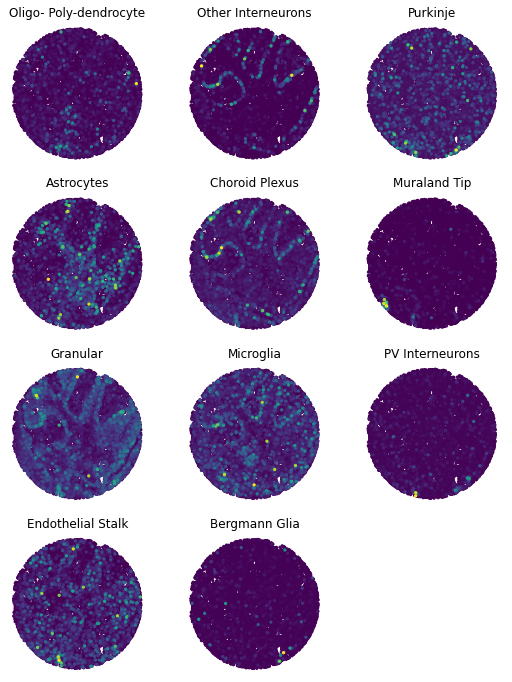

In [18]:
tg.plot_cell_annotation(ad_map, annotation='cluster', nrows=4, ncols=3)

In [2]:
ad_map = sc.read_h5ad('cerebellum_corrected_ad_map_fraction4_nolog.h5ad')

path = os.path.join('data', 'corrected_ad_sc.h5ad')
ad_sc = sc.read_h5ad(path)
sc.pp.normalize_total(ad_sc)
sc.pp.log1p(ad_sc)



AnnData object with n_obs × n_vars = 10904 × 2505
    obs: 'x', 'y'
    var: 'is_training'

In [ ]:
ad_ge = tg.project_genes(adata_map=ad_map, adata_sc=ad_sc)
ad_ge

In [25]:
ad_map.uns['train_genes_df']

,train_score,sparsity_sc,sparsity_sp,sparsity_diff
RP23-403P24.5,0.996727,0.998011,0.999541,0.001531
Gm38148,0.986105,0.999847,0.999908,0.000061
Adamtsl1,0.975939,0.997896,0.999358,0.001462
RP23-7E4.3,0.971590,0.999350,0.999908,0.000559
Gm16099,0.970851,0.999579,0.999633,0.000054
...,...,...,...,...
Pln,NaN,0.998470,1.000000,0.001530
S1pr3,NaN,0.996825,1.000000,0.003175
Sema5b,NaN,0.997207,1.000000,0.002793
Stab1,NaN,0.996710,1.000000,0.003290


In [3]:
genes = ['RP23-403P24.5', 'Gm38148', 'Adamtsl1']
tg.plot_genes(genes, adata_measured=ad_sp, adata_predicted=ad_ge)

NameError: name 'ad_sp' is not defined

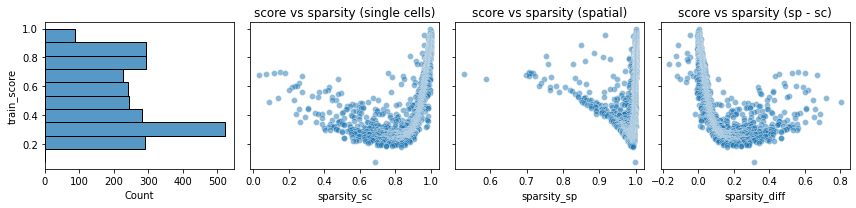

In [23]:
tg.plot_training_scores(ad_map, bins=50, alpha=.5)